In [1]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

In [18]:
df1 = pd.read_csv("C:/Users/ohene/Downloads/Train.csv")

In [19]:
df1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [22]:
df1.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [24]:
df1=df1.drop(columns="ID")

In [25]:
df1.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

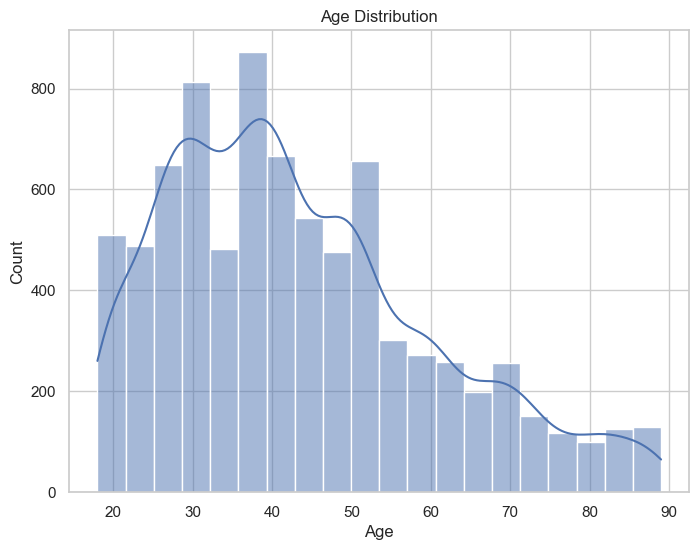

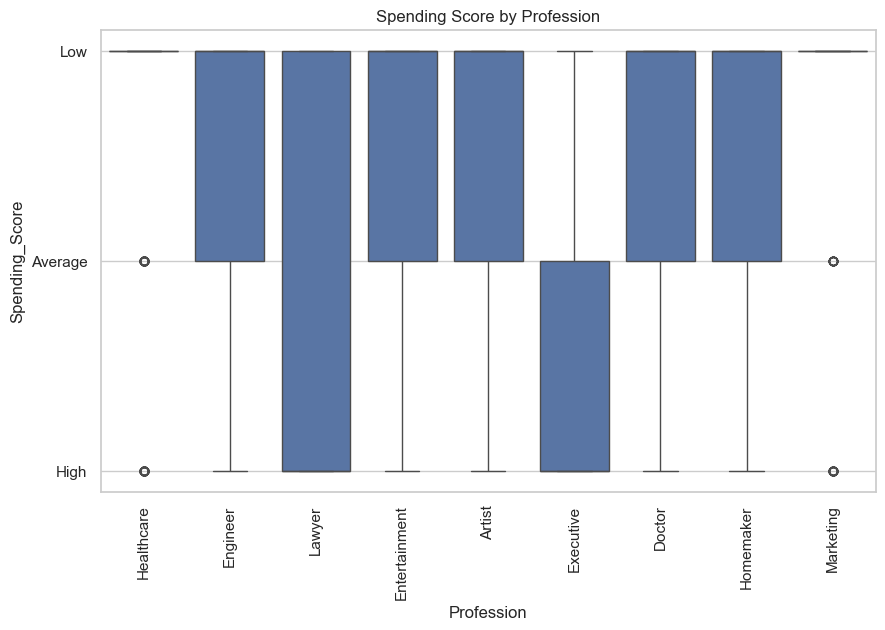

In [26]:
# Age distribution
plt.figure(figsize=(8,6))
sns.histplot(df1['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Spending score vs. profession
plt.figure(figsize=(10,6))
sns.boxplot(x='Profession', y='Spending_Score', data=df1)
plt.xticks(rotation=90)
plt.title('Spending Score by Profession')
plt.show()


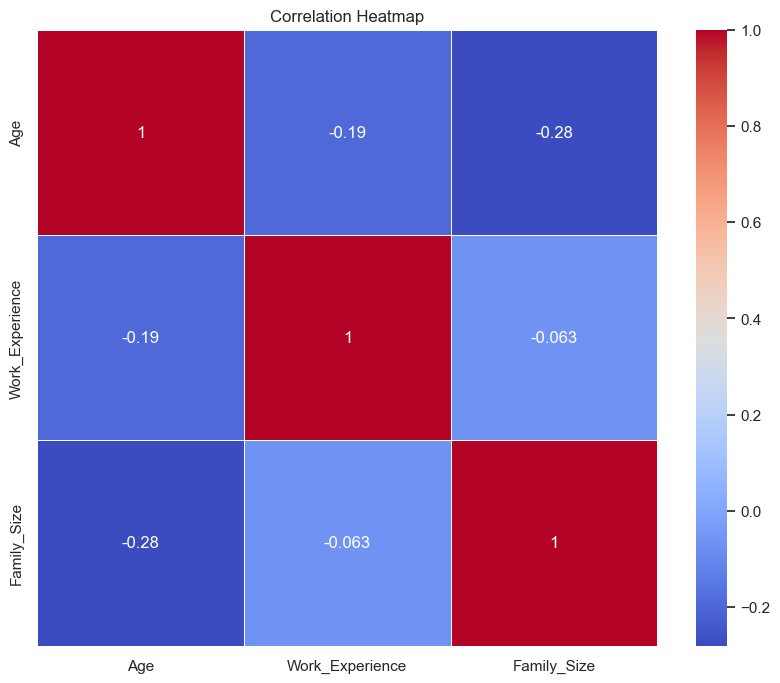

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [27]:
df2 = pd.read_csv("C:/Users/ohene/OneDrive/Documents/new_repo/Mini Project 3/bank-additional/bank-additional/bank-additional-full.csv")

In [28]:
df2.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [29]:
# Inspect column names in both datasets
print(df1.columns)  
print(df2.columns)  


Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')


In [30]:
# Assuming df1 is Dataset 1 and df2 is Dataset 2

# Create a composite key in Dataset 1 (age, profession, marital status)
df1['composite_key'] = df1['Age'].astype(str) + '_' + df1['Profession'] + '_' + df1['Ever_Married']

# Create a composite key in Dataset 2 (age, job, marital status)
# Here, you may need to clean 'job' and 'marital' columns to ensure they match the format of 'Profession' and 'Ever_Married'
df2['composite_key'] = df2['age'].astype(str) + '_' + df2['job'] + '_' + df2['marital']

# Now merge on the composite key
df_merged = pd.merge(df1, df2, on='composite_key', how='inner')  # or 'outer' if you want to keep all rows


KeyError: 'age'

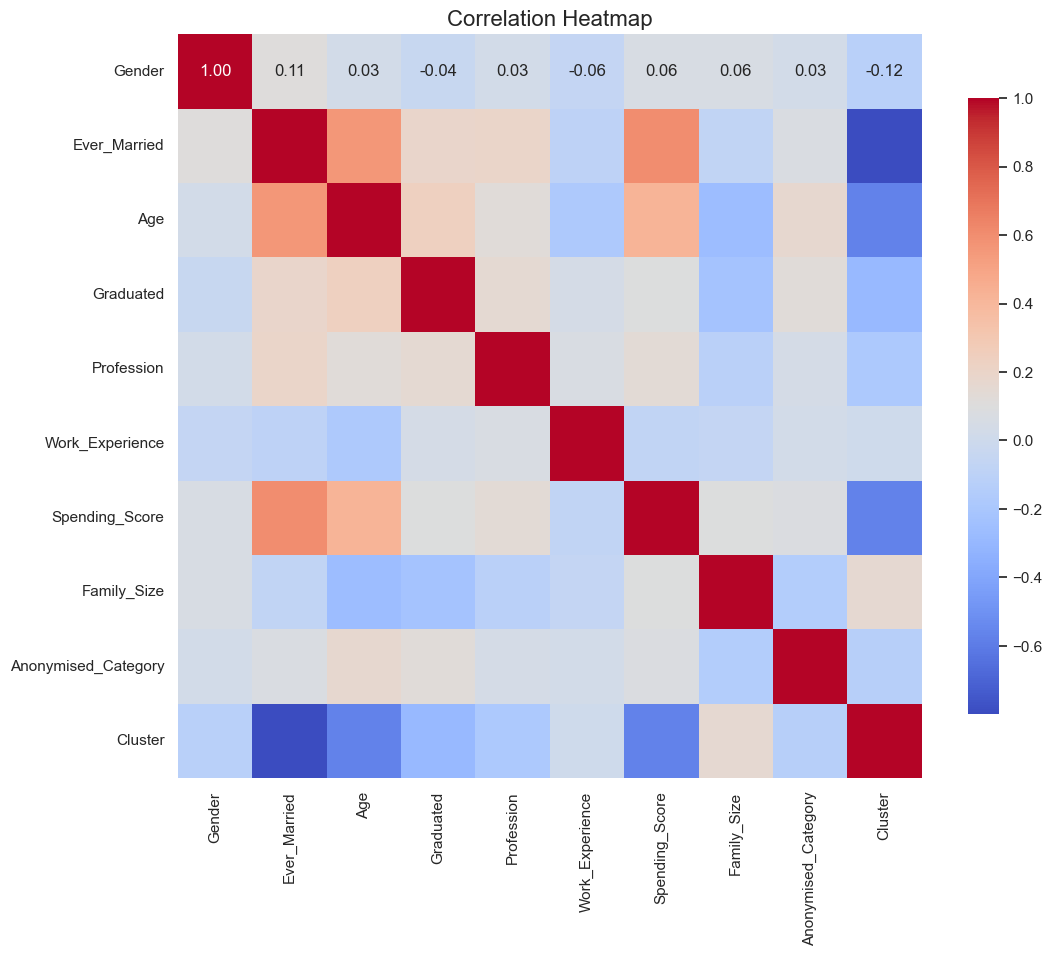

In [75]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [101]:
summary = df.groupby('Cluster').agg(
    Ever_Married_Count=('Ever_Married', lambda x: x.value_counts().to_dict()),  
    Average_Age=('Age', 'mean'),  
    Average_Spending_Score=('Spending_Score', 'mean')  
).reset_index()

print(summary)

   Cluster Ever_Married_Count  Average_Age  Average_Spending_Score
0        1   {1: 4959, 0: 65}    53.417596                1.000199
1        2  {1: 1009, 0: 949}    37.620020                0.366190
2        3  {0: 1576, 1: 346}    38.808533                0.001041
3        4   {0: 1752, 1: 39}    27.213289                0.032942


In [77]:
df.dropna(inplace=True)

In [79]:
x=df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Anonymised_Category']]
y=df["Cluster"]

In [81]:
x.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Anonymised_Category
0,1,0,22,0,0,1.0,0,4.0,3
1,0,1,38,1,1,1.0,1,3.0,3
2,0,1,67,1,1,1.0,0,1.0,5
3,1,1,67,1,2,0.0,2,2.0,5
4,0,1,40,1,3,1.0,2,6.0,5


In [83]:
y.head()

0    4
1    1
2    1
3    1
4    1
Name: Cluster, dtype: int32

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
log_reg=LogisticRegression()
log_reg.fit(x,y)
y_pred_train=log_reg.predict(x_train)
y_pred_test=log_reg.predict(x_test)
print("train set accuracy: ",accuracy_score(y_train,y_pred_train))
print("test set accuracy: ",accuracy_score(y_test,y_pred_test))
print("cross validation score: ",cross_val_score(log_reg,x_train,y_train,cv=5).mean())

train set accuracy:  0.6759755641441216
test set accuracy:  0.6667913238593867
cross validation score:  0.9324285858562318
